In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plthelper import *

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

In [7]:
# Load data

filename = "mdom_all_0.dat"
sensor_directory = "mDOM"
output_directory = "../files/output_geant4/"
path = output_directory + filename

data = pd.read_csv(path, sep = "\t", header = None)
data.columns = ["Event ID", "Time [ns]", "Energy [eV]", "PMT ID", "HIT POS X [m]", "HIT POS Y [m]", "HIT POS Z [m]", "VER POS X [m]", "VER POS Y [m]", "VER POS Z [m]", "?", "?", "?"]

data

,Event ID,Time [ns],Energy [eV],PMT ID,HIT POS X [m],HIT POS Y [m],HIT POS Z [m],VER POS X [m],VER POS Y [m],VER POS Z [m],?,?,?
0,5,1.694805e+05,3.439246,14,-0.052830,0.137215,-0.078974,-8.566575,11.014845,-1.868616,1,0,NaN
1,5,1.694806e+05,3.469582,14,-0.082711,0.123869,-0.053052,-8.566576,11.014662,-1.868525,1,0,NaN
2,32,1.360348e+06,2.965607,13,0.043480,0.125207,-0.093176,5.435983,14.379291,0.825593,1,0,NaN
3,43,2.228969e+06,3.061886,20,0.072092,0.037018,-0.148888,6.994173,5.791090,-12.108909,1,0,NaN
4,55,2.949843e+06,3.436500,2,-0.067056,-0.034652,0.153390,-1.086479,-1.227684,10.160383,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,19487,6.266467e+08,2.880227,17,-0.043127,-0.115034,-0.097549,-1.333590,-4.096466,-5.714561,1,0,NaN
569,19490,6.306823e+08,3.260736,12,0.145973,0.037686,-0.040084,10.647640,6.280629,-3.425717,4790,0,NaN
570,19701,8.525989e+08,2.539593,18,0.070618,-0.137013,-0.051351,0.227755,-2.877266,-4.488193,1,0,NaN
571,19723,8.801957e+08,3.186178,22,-0.071698,0.026352,-0.158751,-7.847777,9.871525,-0.682068,1,1,NaN


In [23]:
data.iloc[:,-2].sum()

np.int64(119)

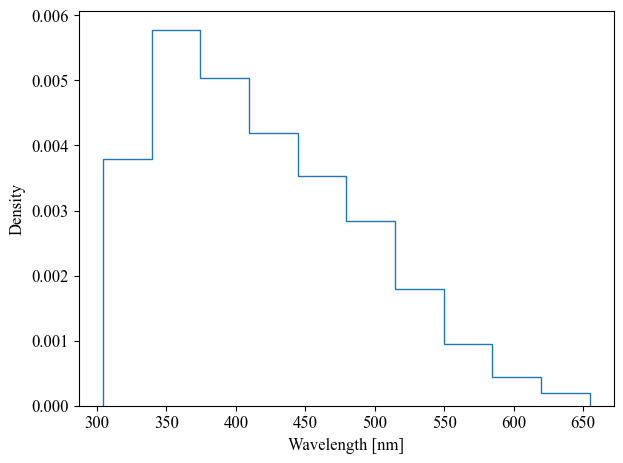

In [8]:
energy = data.iloc[:,2].values
plot_spectrum(energy)

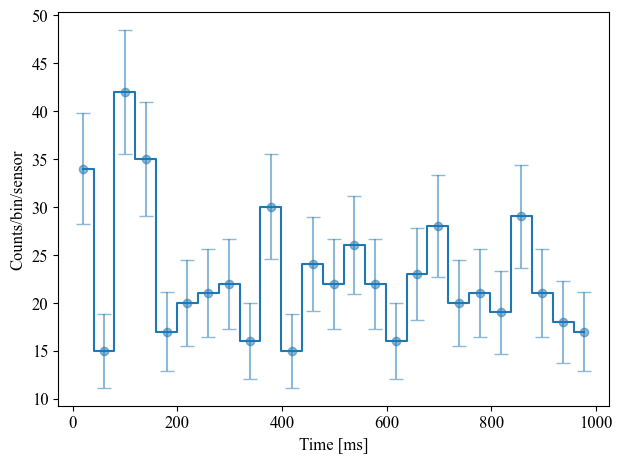

In [9]:
time = data.iloc[:,1].values
plot_lightcurve(time)

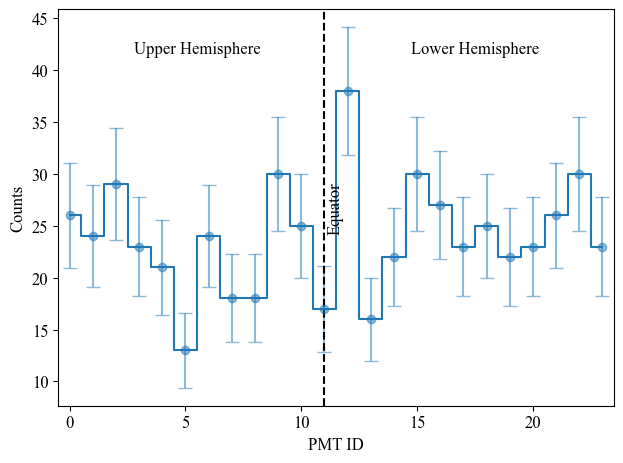

In [10]:
pmts = data.iloc[:,3].values
plot_hits_pmt(pmts)

In [11]:
#ToDo:
# set time window
# noise log-log plots

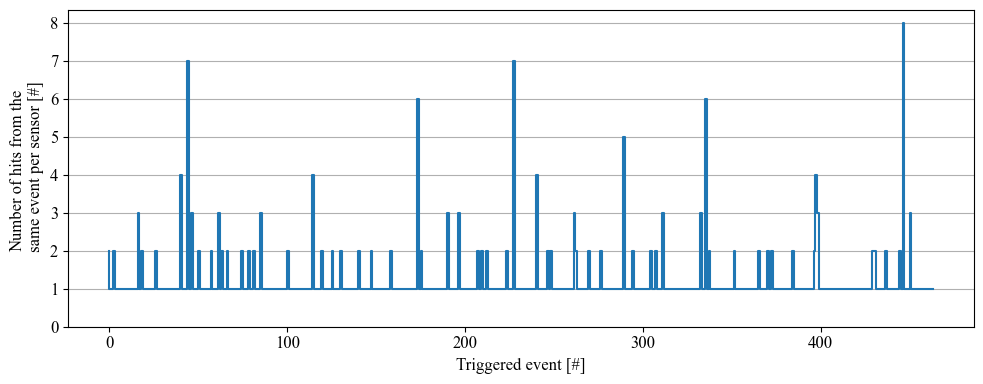

In [12]:
events = data.iloc[:,0]
plot_hits_event(events)

In [13]:
# calculates coincidence rates, time differences, etc.

time_window = 20 # ns
unique_event = np.unique(data.iloc[:,0]) # unique events

time_diff_pmt = [[] for _ in range(24)] # time difference between first and last element depending on how many PMTs recorded hits in an event
time_event = [] # normalized time sequence for each event
count_pmt = np.zeros(24) # number of counts/hits per PMT

for j, ue in enumerate(unique_event): # loop over all unique event IDs
    mask_event = (data.iloc[:,0] == ue).values # mask for entries from the same event

    time = data.iloc[:,1][mask_event].values # all times of a given event
    pmts = data.iloc[:,3][mask_event].values # all PMTstime of a given event
    unique_pmt = np.unique(pmts) # unique PMTs

    time_sorted = np.sort(time) # sort event times
    time_normed = time_sorted - time_sorted[0] # normalized time to first entry

    mask_time = time_normed <= time_window # mask time with time window
    time_masked = time_normed[mask_time]

    if len(time_masked) > 1: # if there is more than one entry
        
        time_diff = time_masked[-1] - time_masked[0] # time difference between first element (=0) and last element
        
        time_event.append(time_masked) # save in list
        
        for i in range(len(unique_pmt)): # loop over number of unique PMTs = coincidence
            time_diff_pmt[i].append(time_diff)

    for i in range(len(unique_pmt)): # loop over number of unique PMTs = coincidence
        count_pmt[i] += len(time_masked)

time_event = np.array(time_event, dtype=object) # transform into array
time_diff_pmt = np.array(time_diff_pmt, dtype=object)

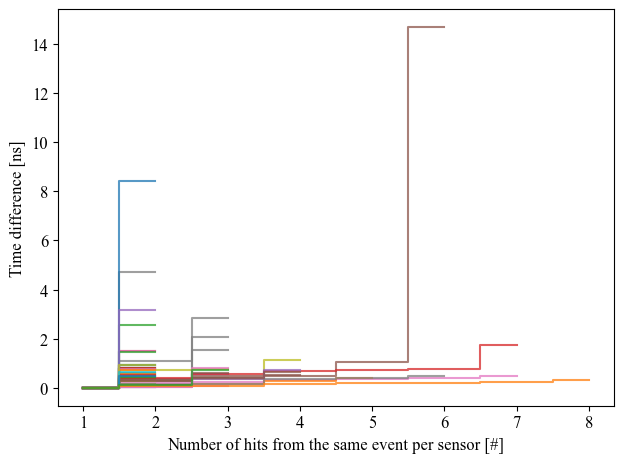

In [14]:
plot_time_event(time_event)

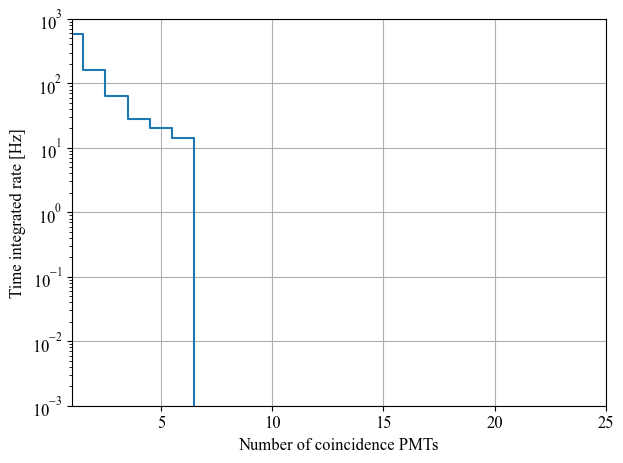

In [15]:
time_window = (data.iloc[:,1].max()-data.iloc[:,1].min())/1E9 # in s
coincidence_rate = count_pmt/time_window
normalized_rate = coincidence_rate/coincidence_rate[0]
plot_coincidence_rate(coincidence_rate)

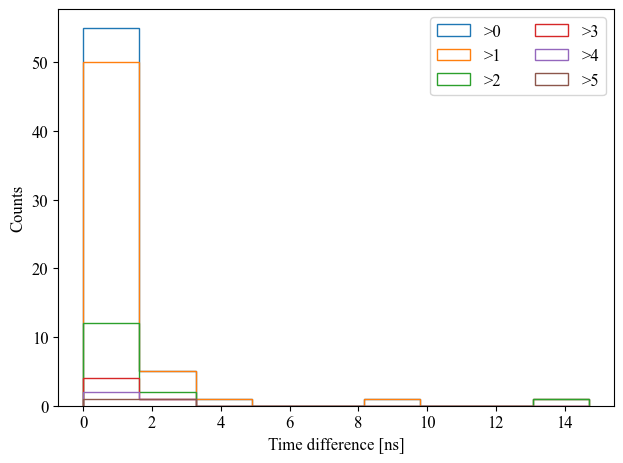

In [16]:
hist_time_diff(time_diff_pmt)

/tmp/ipykernel_48484/382250507.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


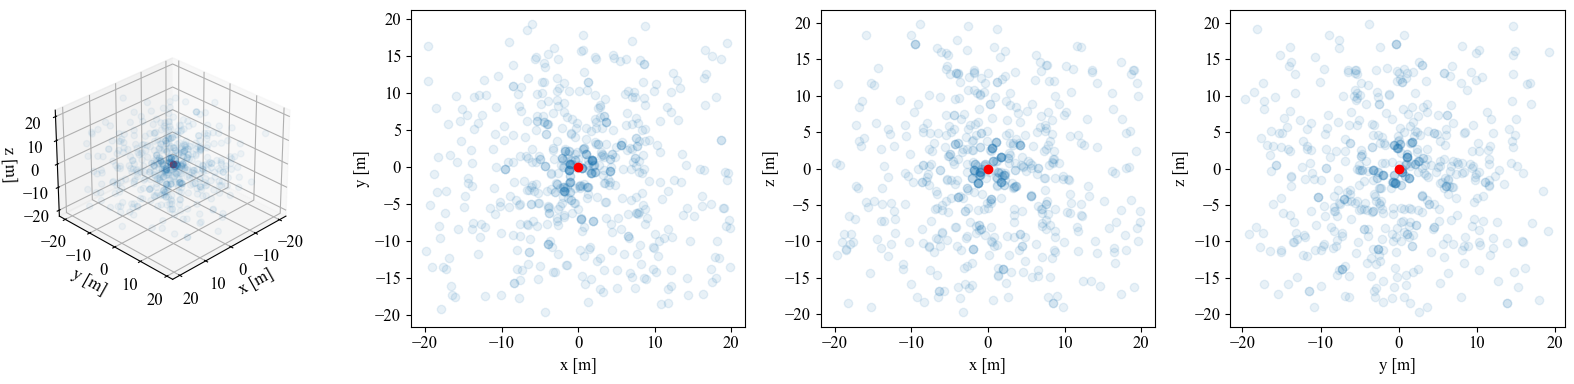

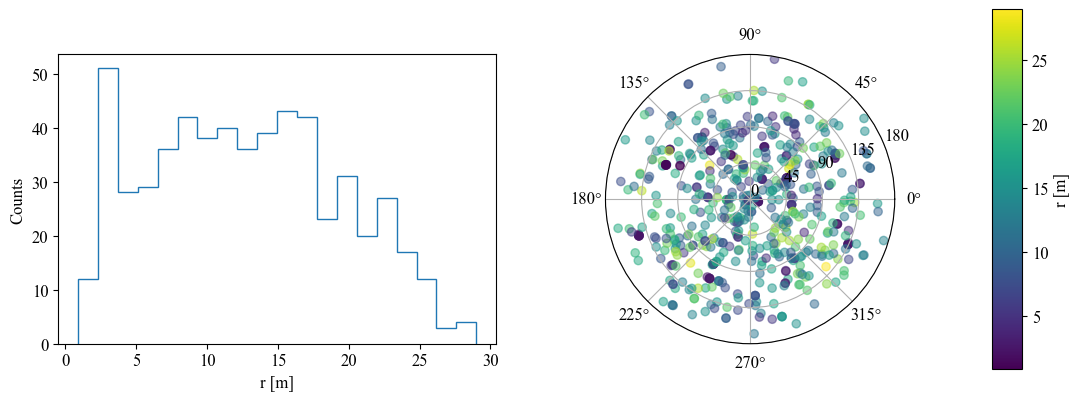

In [17]:
# plot vertex position in cartesian coordinates and spherical coordinates

x = data.iloc[:,7]
y = data.iloc[:,8]
z = data.iloc[:,9]

r = np.sqrt(x**2 + y**2 + z**2) # vertex radial distance
phi = np.arctan2(y, x) # vertex azimuth
theta = np.arccos(z/r) # vertex zenith


fig = plt.figure(figsize = (16,4))

ax1 = fig.add_subplot(1,4,1, projection='3d')
ax1.scatter(x,y,z, alpha = 0.05)
ax1.scatter(0,0,0, color = "red")
ax1.view_init(elev=30., azim=45)
ax1.set_xlabel("x [m]")
ax1.set_ylabel("y [m]")
ax1.set_zlabel("z [m]")
ax1.set_box_aspect(None, zoom=0.8)

ax2 = fig.add_subplot(1,4,2)
ax2.scatter(x,y, alpha = 0.1)
ax2.scatter(0,0, color = "red", zorder = 10)
ax2.set_xlabel("x [m]")
ax2.set_ylabel("y [m]")

ax3 = fig.add_subplot(1,4,3)
ax3.scatter(x,z, alpha = 0.1)
ax3.scatter(0,0, color = "red", zorder = 10)
ax3.set_xlabel("x [m]")
ax3.set_ylabel("z [m]")

ax4 = fig.add_subplot(1,4,4)
ax4.scatter(y,z, alpha = 0.1)
ax4.scatter(0,0, color = "red", zorder = 10)
ax4.set_xlabel("y [m]")
ax4.set_ylabel("z [m]")
plt.tight_layout()


fig = plt.figure(figsize = (10,4))

ax1 = fig.add_subplot(1,2,1)
ax1.hist(r, bins = 20, histtype = "step")
ax1.set_xlabel("r [m]")
ax1.set_ylabel("Counts")

ax2 = fig.add_subplot(1,2,2, polar = True)
sc = ax2.scatter(phi, np.rad2deg(theta), c=r, alpha = 0.5)
ax2.set_ylim(0,180)
ax2.set_yticks([0,45,90,135,180])
#ax2.set_xlabel(r"$\phi$")
#ax2.set_ylabel(r"$\theta$")

cax = fig.add_axes([1,0.1,0.03,0.9])
cbar = fig.colorbar(sc, cax=cax, label="r [m]")#, ticks=[0,10,20,30])
cbar.solids.set(alpha = 1)
plt.tight_layout()


/tmp/ipykernel_48484/4220977335.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


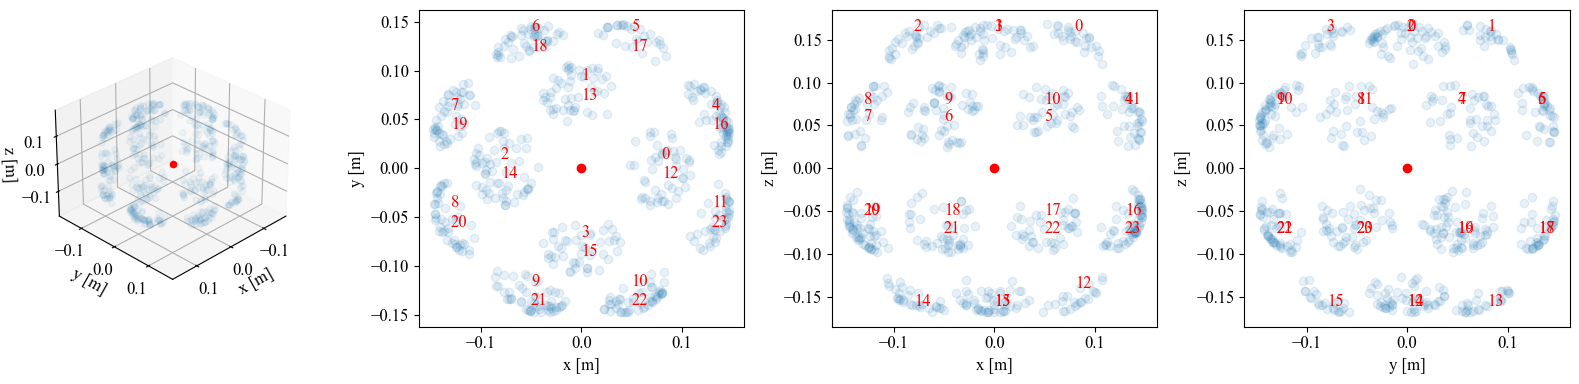

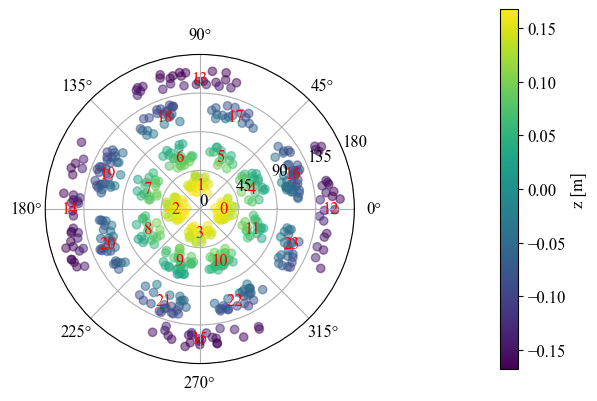

In [18]:
# plot hit position in cartesian coordinates and spherical coordinates

PMT_location = np.array([[0.08, 0, 0.15], [0, 0.08, 0.15], [-0.08, 0, 0.15], [0, -0.08, 0.15],
                         [0.13, 0.05, 0.065], [0.05, 0.13, 0.065], [-0.05, 0.13, 0.065], [-0.13, 0.05, 0.065],
                         [-0.13, -0.05, 0.065], [-0.05, -0.13, 0.065], [0.05, -0.13, 0.065], [0.13, -0.05, 0.065],
                         [0.08, 0, -0.15], [0, 0.08, -0.15], [-0.08, 0, -0.15], [0, -0.08, -0.15],
                         [0.13, 0.05, -0.065], [0.05, 0.13, -0.065], [-0.05, 0.13, -0.065], [-0.13, 0.05, -0.065],
                         [-0.13, -0.05, -0.065], [-0.05, -0.13, -0.065], [0.05, -0.13, -0.065], [0.13, -0.05, -0.065]
                         ]) # in [m]

x = data.iloc[:,4]
y = data.iloc[:,5]
z = data.iloc[:,6]

r = np.sqrt(x**2 + y**2 + z**2) # vertex radial distance
phi = np.arctan2(y, x) # vertex azimuth
theta = np.arccos(z/r) # vertex zenith

fig = plt.figure(figsize = (16,4))

ax1 = fig.add_subplot(1,4,1, projection='3d')
ax1.scatter(x,y,z, alpha = 0.05)
ax1.scatter(0,0,0, color = "red")
ax1.view_init(elev=30., azim=45)
ax1.set_xlabel("x [m]")
ax1.set_ylabel("y [m]")
ax1.set_zlabel("z [m]")
ax1.set_box_aspect(None, zoom=0.8)

ax2 = fig.add_subplot(1,4,2)
ax2.scatter(x,y, alpha = 0.1)
ax2.scatter(0,0, color = "red", zorder = 10)
ax2.set_xlabel("x [m]")
ax2.set_ylabel("y [m]")

for i in range(24):
    xx,yy,zz = PMT_location[i]
    if i <= 11:
        yy +=0.01
    elif i > 11:
        yy -=0.01
    ax2.text(xx, yy, s="{:.0f}".format(i), color = "red")

ax3 = fig.add_subplot(1,4,3)
ax3.scatter(x,z, alpha = 0.1)
ax3.scatter(0,0, color = "red", zorder = 10)
ax3.set_xlabel("x [m]")
ax3.set_ylabel("z [m]")

for i in range(24):
    xx,yy,zz = PMT_location[i]
    if i % 8 <= 4:
        zz +=0.01
    elif i % 8 > 4:
        zz -=0.01
    ax3.text(xx, zz, s="{:.0f}".format(i), color = "red")

ax4 = fig.add_subplot(1,4,4)
ax4.scatter(y,z, alpha = 0.1)
ax4.scatter(0,0, color = "red", zorder = 10)
ax4.set_xlabel("y [m]")
ax4.set_ylabel("z [m]")
plt.tight_layout()

for i in range(24):
    xx,yy,zz = PMT_location[i]
    if i <= 11:
        zz +=0.01
    elif i > 11:
        zz -=0.01
    ax4.text(yy, zz, s="{:.0f}".format(i), color = "red")

fig = plt.figure(figsize = (6,4))

ax2 = fig.add_subplot(1,1,1, polar = True)
sc = ax2.scatter(phi, np.rad2deg(theta), c=z, alpha = 0.5)
ax2.set_ylim(0,180)
ax2.set_yticks([0,45,90,135,180])

for i in range(24):
    xx,yy,zz = PMT_location[i]
    rr = np.sqrt(xx**2 + yy**2 + zz**2) # vertex radial distance
    pp = np.arctan2(yy, xx) # vertex azimuth
    tt = np.arccos(zz/rr)
    ax2.text(pp,np.rad2deg(tt), s="{:.0f}".format(i), color = "red", va="center", ha = "center")

#ax2.set_xlabel(r"$\phi$")
#ax2.set_ylabel(r"$\theta$")

cax = fig.add_axes([1,0.1,0.03,0.9])
cbar = fig.colorbar(sc, cax=cax, label="z [m]")#, ticks=[0,10,20,30])
cbar.solids.set(alpha = 1)
plt.tight_layout()

In [ ]:
# Nakazato model 330ms
#Total Event Produced: 9224
#Computation time: 8349 seconds.
#::::::::::::::this is the end of a run:::::::::::::
#::::::::::::::this is the end:::::::::::::

In [ ]:
# Gamma model
#Total Event Produced: 15027
#Computation time: 9634 seconds.
#::::::::::::::this is the end of a run:::::::::::::
#::::::::::::::this is the end:::::::::::::
#Run time: 2:41:43.792156